In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

log_theta_file = "paad_mixed_08_003"
cancer_type = "paad"
event_file = "G12_PAADPANET_PM_z10_Events_30and5_Full"

# log_theta_file = "luad_mixed_20_8_0035"
# cancer_type = "luad"
# event_file = "G13_LUAD_PM_z1_Events_20and8_Full"

log_theta = pd.read_csv(
    f"../results/{cancer_type}/{log_theta_file}.csv", index_col=0)
tau1, tau2 = np.exp(log_theta.pop("Sampling").iloc[:2])
events = log_theta.columns
log_theta = log_theta.to_numpy()
n = log_theta.shape[0] - 1

data = np.load(f"../simulations/{cancer_type}/{log_theta_file}.npy")

stats = pd.read_csv(
    f"../data/{cancer_type}/stats_{event_file}.csv", index_col=0, header=[0, 1])


In [21]:
# get the counts from the columns and rename them to just what they describe
relations = dict()
for column_name in stats.columns.get_level_values(0).to_list():
    name, no = column_name.split(" (")
    relations[name] = int(no[:-1])
stats.columns = stats.columns.set_levels(relations.keys(), level=0)
stats


Coupled                                    Met Prim_met  \
                      absent present_prim present_met  both present  present   
P.Mut.KRAS              0.22         0.05        0.04  0.69    0.81     0.88   
P.Mut.TP53              0.27         0.07        0.12  0.54    0.58     0.71   
P.gAEP033               0.49         0.16        0.26  0.09    0.31     0.25   
P.chr18.del.single.1    0.62         0.14        0.18  0.07    0.33     0.27   
P.chrX.del.single.1     0.72         0.11        0.12  0.05    0.18     0.15   
P.Mut.SMAD4             0.73         0.04        0.04  0.19    0.21     0.20   
P.chr20.amp.single.1    0.64         0.15        0.11  0.11    0.16     0.17   
P.chr17.del.single.1    0.76         0.08        0.14  0.03    0.16     0.15   
P.Mut.CDKN2A            0.82         0.01        0.05  0.11    0.15     0.10   
P.Mut.ARID1A            0.88         0.01        0.04  0.07    0.08     0.08   
P.Mut.RNF43             0.95         0.00        0.00  0.05    0.06     0.05   
P.Mut.MEN1              0.91         0.00        0.00  0.09    0.08     0.04   
P.Mut.TGFBR2            0.99         0.00        0.01  0.00    0.05     0.04   
P.Mut.KDM6A             1.00         0.00        0.00  0.00    0.03     0.04   
P.Mut.KMT2D             0.97         0.00        0.01  0.01    0.05     0.02   
P.Mut.GNAS              0.97         0.00        0.01  0.01    0.05     0.04   
P.Mut.DAXX              0.86         0.00        0.04  0.09    0.01     0.02   
P.Mut.KMT2C             0.95         0.00        0.01  0.04    0.03     0.03   
P.Mut.ATM               0.95         0.00        0.01  0.04    0.01     0.02   
P.Mut.RBM10             1.00         0.00        0.00  0.00    0.02     0.03   
P.Mut.BRCA2             0.95         0.00        0.03  0.03    0.00     0.02   
P.Mut.SETD2             0.95         0.00        0.04  0.01    0.03     0.02   
P.Mut.ATRX              0.95         0.01        0.01  0.03    0.03     0.02   
P.Mut.PIK3CA            1.00         0.00        0.00  0.00    0.03     0.02   
P.Mut.RB1               0.99         0.00        0.00  0.01    0.03     0.02   
P.Mut.TGFBR1            0.99         0.01        0.00  0.00    0.03     0.02   
P.Mut.SMARCA4           0.95         0.04        0.01  0.00    0.00     0.01   
P.Mut.SMAD3             0.97         0.00        0.03  0.00    0.01     0.02   
P.Mut.MAP2K4            0.99         0.00        0.00  0.01    0.02     0.01   
P.Mut.TSC2              0.93         0.00        0.05  0.01    0.01     0.01   
P.Mut.BCOR              1.00         0.00        0.00  0.00    0.02     0.01   
P.Mut.U2AF1             0.97         0.01        0.01  0.00    0.01     0.01   
P.Mut.SF3B1             0.99         0.00        0.00  0.01    0.01     0.01   
P.Mut.STK11             1.00         0.00        0.00  0.00    0.01     0.01   
P.Mut.PTPRT             0.99         0.00        0.01  0.00    0.03     0.01   
Seeding                 0.00         1.00        0.00  0.00    0.00     1.00   

                     Prim_no_met  
                         present  
P.Mut.KRAS                  0.85  
P.Mut.TP53                  0.71  
P.gAEP033                   0.47  
P.chr18.del.single.1        0.40  
P.chrX.del.single.1         0.28  
P.Mut.SMAD4                 0.19  
P.chr20.amp.single.1        0.24  
P.chr17.del.single.1        0.27  
P.Mut.CDKN2A                0.14  
P.Mut.ARID1A                0.09  
P.Mut.RNF43                 0.05  
P.Mut.MEN1                  0.04  
P.Mut.TGFBR2                0.03  
P.Mut.KDM6A                 0.04  
P.Mut.KMT2D                 0.04  
P.Mut.GNAS                  0.02  
P.Mut.DAXX                  0.03  
P.Mut.KMT2C                 0.02  
P.Mut.ATM                   0.03  
P.Mut.RBM10                 0.02  
P.Mut.BRCA2                 0.03  
P.Mut.SETD2                 0.02  
P.Mut.ATRX                  0.02  
P.Mut.PIK3CA                0.03  
P.Mut.RB1                   0.02  
P.Mut.TGFBR1                0.02  


In [22]:
# simulate t1s and "freeze" all simulated datapoints at these times
times1 = np.random.exponential(1/tau1, size=(data.shape[0], 1))
simulated_timed_1 = np.where(data < times1, data, 0)
(simulated_timed_1[:, -1] > 0).sum()


665292

In [24]:
# simulate \Delta ts and "freeze" all simulated datapoints at t2
times2 = np.random.exponential(1/tau2, size=(data.shape[0], 1))
simulated_timed_2 = np.where(data < times1 + times2, data, 0)
(simulated_timed_2[:, -1] > 0).sum()


818298

In [25]:
# get all the samples at t1 that never (as far as t2) develop a metastasis
never_met = simulated_timed_1[simulated_timed_2[:, -1] == 0]
# get all the samples at t1 that already have a metastasis at t1
met = simulated_timed_1[simulated_timed_1[:, -1] > 0]


In [27]:
# binarize the nevermets and get the event frequencies for these
never_met_bin = (never_met > 0).astype(int)
never_met_frequencies = never_met_bin.sum(axis=0) / never_met_bin.shape[0]
never_met_frequencies = never_met_frequencies[::2]


In [42]:
comparison = stats["Prim_no_met"].copy()
comparison.columns = ["Dataset"]
comparison["Simulated"] = never_met_frequencies


In [47]:
# binarize the mets and get the event frequencies for mets and prims with mets
met_bin = (met > 0).astype(int)
met_frequencies = met_bin.sum(axis=0) / met_bin.shape[0]
prim_met_frequencies = met_frequencies[::2]
met_frequencies = np.append(met_frequencies[1::2], met_frequencies[-1])


<AxesSubplot: >

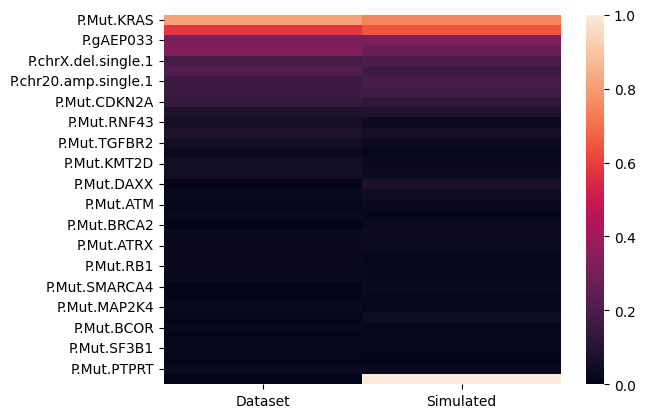

In [48]:
comparison = stats["Met"].copy()
comparison.columns = ["Dataset"]
comparison["Simulated"] = met_frequencies
sns.heatmap(comparison)


<AxesSubplot: >

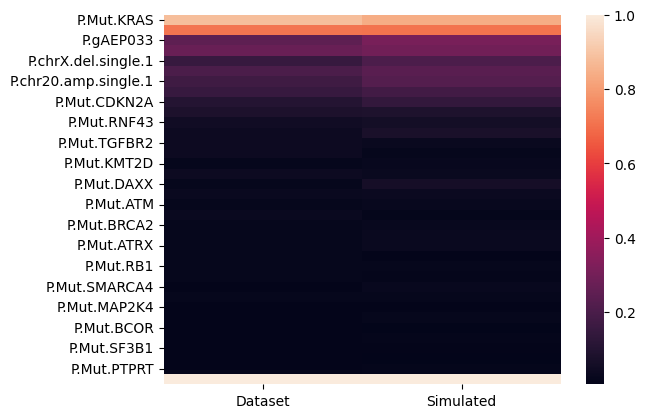

In [49]:
comparison = stats["Prim_met"].copy()
comparison.columns = ["Dataset"]
comparison["Simulated"] = prim_met_frequencies
sns.heatmap(comparison)


In [41]:
comparison = stats.copy()
comparison.drop(("Coupled", "absent"), axis=1, inplace=True)
pd.concat([comparison], keys=["Foo"], names=["Firstlevel"], axis=1)


Firstlevel                    Foo                                     \
                          Coupled                       Met Prim_met   
                     present_prim present_met  both present  present   
P.Mut.KRAS                   0.05        0.04  0.69    0.81     0.88   
P.Mut.TP53                   0.07        0.12  0.54    0.58     0.71   
P.gAEP033                    0.16        0.26  0.09    0.31     0.25   
P.chr18.del.single.1         0.14        0.18  0.07    0.33     0.27   
P.chrX.del.single.1          0.11        0.12  0.05    0.18     0.15   
P.Mut.SMAD4                  0.04        0.04  0.19    0.21     0.20   
P.chr20.amp.single.1         0.15        0.11  0.11    0.16     0.17   
P.chr17.del.single.1         0.08        0.14  0.03    0.16     0.15   
P.Mut.CDKN2A                 0.01        0.05  0.11    0.15     0.10   
P.Mut.ARID1A                 0.01        0.04  0.07    0.08     0.08   
P.Mut.RNF43                  0.00        0.00  0.05    0.06     0.05   
P.Mut.MEN1                   0.00        0.00  0.09    0.08     0.04   
P.Mut.TGFBR2                 0.00        0.01  0.00    0.05     0.04   
P.Mut.KDM6A                  0.00        0.00  0.00    0.03     0.04   
P.Mut.KMT2D                  0.00        0.01  0.01    0.05     0.02   
P.Mut.GNAS                   0.00        0.01  0.01    0.05     0.04   
P.Mut.DAXX                   0.00        0.04  0.09    0.01     0.02   
P.Mut.KMT2C                  0.00        0.01  0.04    0.03     0.03   
P.Mut.ATM                    0.00        0.01  0.04    0.01     0.02   
P.Mut.RBM10                  0.00        0.00  0.00    0.02     0.03   
P.Mut.BRCA2                  0.00        0.03  0.03    0.00     0.02   
P.Mut.SETD2                  0.00        0.04  0.01    0.03     0.02   
P.Mut.ATRX                   0.01        0.01  0.03    0.03     0.02   
P.Mut.PIK3CA                 0.00        0.00  0.00    0.03     0.02   
P.Mut.RB1                    0.00        0.00  0.01    0.03     0.02   
P.Mut.TGFBR1                 0.01        0.00  0.00    0.03     0.02   
P.Mut.SMARCA4                0.04        0.01  0.00    0.00     0.01   
P.Mut.SMAD3                  0.00        0.03  0.00    0.01     0.02   
P.Mut.MAP2K4                 0.00        0.00  0.01    0.02     0.01   
P.Mut.TSC2                   0.00        0.05  0.01    0.01     0.01   
P.Mut.BCOR                   0.00        0.00  0.00    0.02     0.01   
P.Mut.U2AF1                  0.01        0.01  0.00    0.01     0.01   
P.Mut.SF3B1                  0.00        0.00  0.01    0.01     0.01   
P.Mut.STK11                  0.00        0.00  0.00    0.01     0.01   
P.Mut.PTPRT                  0.00        0.01  0.00    0.03     0.01   
Seeding                      1.00        0.00  0.00    0.00     1.00   

Firstlevel                        
                     Prim_no_met  
                         present  
P.Mut.KRAS                  0.85  
P.Mut.TP53                  0.71  
P.gAEP033                   0.47  
P.chr18.del.single.1        0.40  
P.chrX.del.single.1         0.28  
P.Mut.SMAD4                 0.19  
P.chr20.amp.single.1        0.24  
P.chr17.del.single.1        0.27  
P.Mut.CDKN2A                0.14  
P.Mut.ARID1A                0.09  
P.Mut.RNF43                 0.05  
P.Mut.MEN1                  0.04  
P.Mut.TGFBR2                0.03  
P.Mut.KDM6A                 0.04  
P.Mut.KMT2D                 0.04  
P.Mut.GNAS                  0.02  
P.Mut.DAXX                  0.03  
P.Mut.KMT2C                 0.02  
P.Mut.ATM                   0.03  
P.Mut.RBM10                 0.02  
P.Mut.BRCA2                 0.03  
P.Mut.SETD2                 0.02  
P.Mut.ATRX                  0.02  
P.Mut.PIK3CA                0.03  
P.Mut.RB1                   0.02  
P.Mut.TGFBR1                0.02  
P.Mut.SMARCA4               0.02  
P.Mut.SMAD3                 0.01  
P.Mut.MAP2K4                0.02  
P.Mut.TSC2                  0.02  
P.Mut.BCOR                  0.01  
P